In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [89]:
df = pd.read_csv('/content/drive/MyDrive/Colabnot/NetflixOriginals.csv', encoding='latin-1')
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [92]:
df.isna().sum() #boş değer kontrolü

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

**1-Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.**

In [93]:
df_redu = df[df.Runtime > 90]
df_redu.reset_index(inplace = True)

fig = px.bar(data_frame=df_redu, x=df_redu.Title, y=df_redu["Language"], labels={"y":"Runtime"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()





**2-2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.**

In [94]:
df["Date"] = pd.to_datetime(df.Premiere)
doc = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-01") & (df["Date"] < "2020-06-01")]

fig = px.bar(data_frame=doc, x=doc.Title, y=doc["IMDB Score"], labels={"y":"IMDB Score", "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()


**3-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?**

In [95]:
df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


**4-'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?**

In [96]:
hindi = df[df["Language"] == "Hindi"]["Runtime"].mean()
print("hindi dilinde ortalama süre :",hindi)

hindi dilinde ortalama süre : 115.78787878787878


**5-'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.**

In [97]:
len(df["Genre"].value_counts()) 



115

In [98]:
genre = df.Genre.value_counts().nlargest(20) 
genre

Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Concert Film                  6
Aftershow / Interview         6
Animation                     5
Action comedy                 5
Romantic drama                5
Psychological thriller        4
Science fiction/Thriller      4
Variety show                  4
Science fiction               4
Name: Genre, dtype: int64

In [99]:
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

**6-Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.**

In [100]:
print("en çok kullanılan 3 dil : ",df.Language.value_counts()[0:3])

en çok kullanılan 3 dil :  English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


**7-IMDB puanı en yüksek olan ilk 10 film hangileridir?**

In [101]:
top_10 = df.sort_values("IMDB Score",ascending=False)
top_10 = top_10[0:10]
top_10

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


**8-IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.**

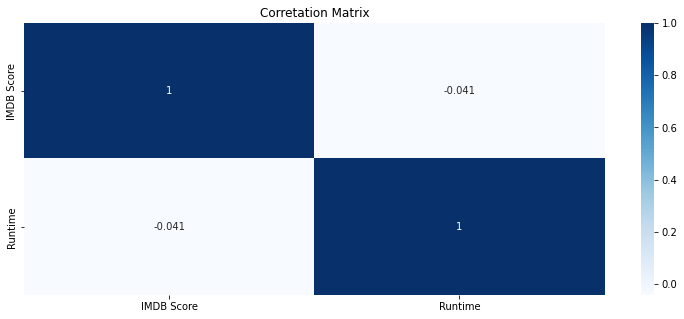

In [102]:
corr = df.loc[:, ["IMDB Score", "Runtime"]].corr()

plt.figure(figsize=(13,5))
sns.heatmap(corr, annot = True,cmap='Blues')
plt.title("Corretation Matrix")
plt.show()

**9-IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.**

In [103]:
top_10_genre= df.groupby('Genre', as_index=False)['IMDB Score'].mean().sort_values(by = "IMDB Score", ascending = False)[0:10]

fig = px.bar(data_frame=doc, x=doc.Title, y=doc["IMDB Score"], labels={"y":"Genre", "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

**10-'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.**

In [104]:
runtime_10=df.sort_values(by="Runtime",ascending=False)[0:10]
runtime_10

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
247,Citation,Drama,"November 6, 2020",151,6.2,English,2020-11-06
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese,2019-10-11
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi,2020-07-31
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi,2020-11-12
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English,2021-05-21
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01


In [105]:
fig = px.bar(data_frame=doc, x=doc.Title, y=doc["Runtime"], labels={ "index":"Titles"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

**11-Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.**

In [106]:
df['Year']=df['Date'].dt.year
df['Year'].value_counts(sort=True)[0:1]
year = df['Year'].value_counts(sort=True)
year.head(1)

2020    183
Name: Year, dtype: int64

In [107]:
fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

**12-Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.**

In [108]:
lower_imdb_lang= df.groupby('Language', as_index=False)['IMDB Score'].mean().sort_values(by = "IMDB Score")
lower_imdb_lang.head(5)

,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
26,Norwegian,5.100000
14,Filipino,5.100000
27,Polish,5.166667


**13-Hangi yılın toplam "runtime" süresi en fazladır?**

In [122]:
df["Year"] = pd.to_datetime(df["Premiere"]).dt.year
rt_year=df.groupby("Year", as_index=False)['Runtime'].sum().sort_values(by = "Runtime", ascending = False)
rt_year.head(1)

,Year,Runtime
6,2020,17384


**14-Her bir dilin en fazla kullanıldığı "Genre" nedir?**

In [132]:
df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

**15-Veri setinde outlier veri var mıdır? Açıklayınız.**

ValueError: ignored